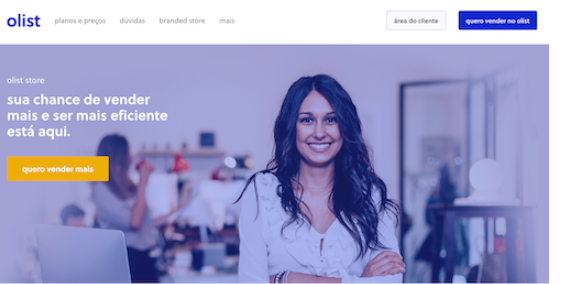

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import datetime as dt
from sklearn.cluster import KMeans
from sklearn import preprocessing, cluster, metrics, decomposition
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import pca
from pca import pca
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('olist_dataset.csv')

In [3]:
df.head()

,customer_unique_id,order_approved_at,temps_session,experience_client,temps_livraison_estime,review_classification,temps_de_reponse,longueur_comment_message,bed_bath_table,health_beauty,...,kitchen_dining_laundry_garden_furniture,air_conditioning,food_drink,fashion_shoes,industry_commerce_and_business,books_technical,recency,frequency,monetary_value,rfm_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,891.0,553930.0,910122.0,3.0,4.572778,111.0,141.9,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,234,1.0,141.90,Meileurs clients
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,26057.0,283875.0,624856.0,2.0,0.937095,1.0,0.0,27.19,...,0.0,0.0,0.0,0.0,0.0,0.0,237,1.0,27.19,Clients occasionnels à petit budget
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,0.0,2223224.0,2343297.0,2.0,1.055370,1.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,660,1.0,86.22,Clients anciens petit budget
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,1176.0,1731204.0,2689843.0,2.0,1.012396,12.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,444,1.0,43.62,Clients occasionnels à petit budget
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,1270.0,1135394.0,1741988.0,3.0,4.937211,1.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,411,1.0,196.89,Clients occasionnels à gros budget


In [4]:
df.columns

Index(['customer_unique_id', 'order_approved_at', 'temps_session',
       'experience_client', 'temps_livraison_estime', 'review_classification',
       'temps_de_reponse', 'longueur_comment_message', 'bed_bath_table',
       'health_beauty', 'sports_leisure', 'furniture_decor',
       'computers_accessories', 'housewares', 'watches_gifts', 'telephony',
       'garden_tools', 'auto', 'toys', 'cool_stuff', 'perfumery', 'baby',
       'electronics', 'stationery', 'fashion_bags_accessories', 'pet_shop',
       'office_furniture', 'luggage_accessories', 'consoles_games',
       'construction_tools_construction', 'home_appliances',
       'small_appliances', 'musical_instruments', 'home_construction',
       'books_general_interest', 'furniture_living_room', 'food',
       'home_confort', 'audio', 'drinks', 'market_place',
       'construction_tools_lights', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'food_drink', 'fashion_shoes',
       'industry_commerce_and_bus

In [5]:
df.isna().sum()

customer_unique_id                         0
order_approved_at                          0
temps_session                              0
experience_client                          0
temps_livraison_estime                     0
review_classification                      0
temps_de_reponse                           0
longueur_comment_message                   0
bed_bath_table                             0
health_beauty                              0
sports_leisure                             0
furniture_decor                            0
computers_accessories                      0
housewares                                 0
watches_gifts                              0
telephony                                  0
garden_tools                               0
auto                                       0
toys                                       0
cool_stuff                                 0
perfumery                                  0
baby                                       0
electronic

## Normalisation 

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
df_transform = df.copy()

In [8]:
scaler = StandardScaler()

In [9]:
cols_to_scale = ['temps_session', 'experience_client',
                 'temps_livraison_estime', 'temps_de_reponse',
                 'longueur_comment_message', 'bed_bath_table',
                 'health_beauty', 'sports_leisure', 'furniture_decor',
                 'computers_accessories', 'housewares', 'watches_gifts', 'telephony',
                 'garden_tools', 'auto', 'toys', 'cool_stuff', 'perfumery', 'baby',
                 'electronics', 'stationery', 'fashion_bags_accessories', 'pet_shop',
                 'office_furniture', 'luggage_accessories', 'consoles_games',
                 'construction_tools_construction', 'home_appliances',
                 'small_appliances', 'musical_instruments', 'home_construction',
                 'books_general_interest', 'furniture_living_room', 'food',
                 'home_confort', 'audio', 'drinks', 'market_place',
                 'construction_tools_lights', 'kitchen_dining_laundry_garden_furniture',
                 'air_conditioning', 'food_drink', 'fashion_shoes',
                 'industry_commerce_and_business', 'books_technical', 'recency',
                 'frequency', 'monetary_value']

In [10]:
def scaleColumns(df_transform, cols_to_scale):
    for col in cols_to_scale:
        df_transform[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df_transform[col])),columns=[col])
    return df_transform

In [11]:
df_scaled = scaleColumns(df_transform, cols_to_scale)
df_scaled

,customer_unique_id,order_approved_at,temps_session,experience_client,temps_livraison_estime,review_classification,temps_de_reponse,longueur_comment_message,bed_bath_table,health_beauty,...,kitchen_dining_laundry_garden_furniture,air_conditioning,food_drink,fashion_shoes,industry_commerce_and_business,books_technical,recency,frequency,monetary_value,rfm_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,-0.497017,-0.644179,-1.486913,3.0,0.149248,1.788470,0.959182,-0.163731,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,-0.824816,-0.301230,-0.151566,Meileurs clients
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,-0.146233,-0.976614,-1.873083,2.0,-0.224944,-0.571546,-0.145526,0.088595,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,-0.804923,-0.301230,-0.411915,Clients occasionnels à petit budget
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,-0.509437,1.410707,0.453205,2.0,-0.212771,-0.571546,-0.145526,-0.163731,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,1.999912,-0.301230,-0.277939,Clients anciens petit budget
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,-0.493045,0.805034,0.922331,2.0,-0.217194,-0.335544,-0.145526,-0.163731,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,0.567656,-0.301230,-0.374625,Clients occasionnels à petit budget
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,-0.491734,0.071598,-0.360799,3.0,0.186756,-0.571546,-0.145526,-0.163731,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,0.348839,-0.301230,-0.026759,Clients occasionnels à gros budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91069,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,-0.497170,1.600353,3.610332,3.0,0.138905,-0.571546,-0.145526,38.208128,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,1.403139,1.006343,8.910946,Clients occasionnels à gros budget
91070,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,-0.502411,1.875036,1.041968,2.0,0.244107,-0.571546,-0.145526,-0.163731,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,0.176438,-0.301230,-0.281661,Clients occasionnels à petit budget
91071,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,-0.498174,0.255697,2.466103,3.0,-0.050982,-0.571546,-0.145526,-0.163731,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,2.205467,-0.301230,-0.218384,Clients anciens petit budget
91072,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,-0.475063,-0.064783,0.244158,3.0,-0.050054,2.260473,-0.145526,-0.163731,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,-0.771769,-0.301230,-0.170199,Clients occasionnels à gros budget


In [12]:
df_scaled.drop(['order_approved_at'],axis=1,inplace=True)

#  Kmeans Clustering
## Kmeans RFM (3 variables)

In [13]:
df_kmeans = df_scaled.copy()

In [14]:
df_kmeans = df_kmeans.set_index('customer_unique_id')

In [15]:
# Données
df_kmeans_rfm = df_kmeans[['recency','frequency','monetary_value']]

In [16]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=0).fit(df_kmeans_rfm)
                for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]

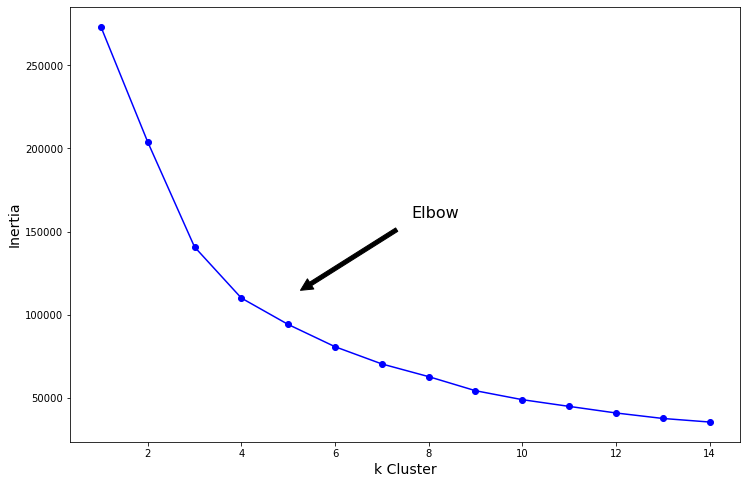

In [17]:
# plot inertia as a function of k and analyze the resulting curve.
plt.figure(figsize=(12, 8))
plt.plot(range(1, 15), inertias, 'bo-')
plt.xlabel('k Cluster', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords="figure fraction",
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

In [18]:
k = 4
kmeans = KMeans(n_clusters=k,random_state=0).fit(df_kmeans_rfm)

In [19]:
df_kmeans['Kmeans_cluster'] = kmeans.labels_

In [20]:
df_kmeans.head()

,temps_session,experience_client,temps_livraison_estime,review_classification,temps_de_reponse,longueur_comment_message,bed_bath_table,health_beauty,sports_leisure,furniture_decor,...,air_conditioning,food_drink,fashion_shoes,industry_commerce_and_business,books_technical,recency,frequency,monetary_value,rfm_segment,Kmeans_cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-0.497017,-0.644179,-1.486913,3.0,0.149248,1.788470,0.959182,-0.163731,-0.157067,-0.107192,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,-0.824816,-0.30123,-0.151566,Meileurs clients,1
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.146233,-0.976614,-1.873083,2.0,-0.224944,-0.571546,-0.145526,0.088595,-0.157067,-0.107192,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,-0.804923,-0.30123,-0.411915,Clients occasionnels à petit budget,1
0000f46a3911fa3c0805444483337064,-0.509437,1.410707,0.453205,2.0,-0.212771,-0.571546,-0.145526,-0.163731,-0.157067,-0.107192,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,1.999912,-0.30123,-0.277939,Clients anciens petit budget,3
0000f6ccb0745a6a4b88665a16c9f078,-0.493045,0.805034,0.922331,2.0,-0.217194,-0.335544,-0.145526,-0.163731,-0.157067,-0.107192,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,0.567656,-0.30123,-0.374625,Clients occasionnels à petit budget,3
0004aac84e0df4da2b147fca70cf8255,-0.491734,0.071598,-0.360799,3.0,0.186756,-0.571546,-0.145526,-0.163731,-0.157067,-0.107192,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,0.348839,-0.30123,-0.026759,Clients occasionnels à gros budget,3


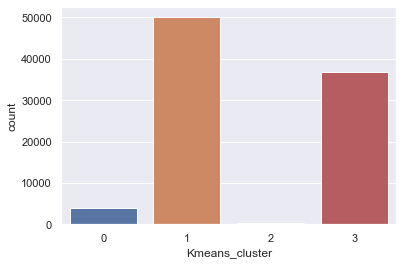

In [21]:
# repartition nb de pays /cluster
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Kmeans_cluster", data=df_kmeans)

In [22]:
# les moyennes des groupes Kmeans par feature
df_kmeans_gb = df_kmeans.groupby(["Kmeans_cluster"]).mean()
df_kmeans_gb

,temps_session,experience_client,temps_livraison_estime,review_classification,temps_de_reponse,longueur_comment_message,bed_bath_table,health_beauty,sports_leisure,furniture_decor,...,construction_tools_lights,kitchen_dining_laundry_garden_furniture,air_conditioning,food_drink,fashion_shoes,industry_commerce_and_business,books_technical,recency,frequency,monetary_value
Kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.034786,-0.036487,0.092970,2.239435,-0.021671,0.227308,0.688561,0.324221,0.557159,0.725909,...,0.288593,0.092951,0.114830,0.178665,0.070968,0.115897,-0.020198,-0.035896,3.016412,1.628741
1,0.008479,-0.031290,-0.078940,2.467908,-0.023038,-0.009407,-0.041697,-0.001140,-0.028369,-0.041939,...,-0.001234,-0.003359,-0.009000,-0.009535,-0.016512,0.004367,0.010392,-0.723080,-0.156861,-0.105939
2,0.500536,0.200761,0.275706,2.048271,0.000139,0.231316,3.135102,1.578140,0.727829,3.969939,...,-0.033266,0.836727,1.126641,-0.029574,-0.037891,-0.029566,-0.038945,-0.049670,8.046166,13.592362
3,-0.018010,0.045105,0.095676,2.470612,0.033509,-0.012448,-0.033721,-0.041533,-0.024230,-0.042087,...,-0.028454,-0.009992,-0.006299,-0.005673,0.015147,-0.017926,-0.011744,0.984330,-0.150199,-0.105150


In [23]:
df_kmeans_real_val = pd.merge(df_scaled,df_kmeans['Kmeans_cluster'], on="customer_unique_id")

In [24]:
df_kmeans_real_val

,customer_unique_id,temps_session,experience_client,temps_livraison_estime,review_classification,temps_de_reponse,longueur_comment_message,bed_bath_table,health_beauty,sports_leisure,...,air_conditioning,food_drink,fashion_shoes,industry_commerce_and_business,books_technical,recency,frequency,monetary_value,rfm_segment,Kmeans_cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.497017,-0.644179,-1.486913,3.0,0.149248,1.788470,0.959182,-0.163731,-0.157067,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,-0.824816,-0.301230,-0.151566,Meileurs clients,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.146233,-0.976614,-1.873083,2.0,-0.224944,-0.571546,-0.145526,0.088595,-0.157067,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,-0.804923,-0.301230,-0.411915,Clients occasionnels à petit budget,1
2,0000f46a3911fa3c0805444483337064,-0.509437,1.410707,0.453205,2.0,-0.212771,-0.571546,-0.145526,-0.163731,-0.157067,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,1.999912,-0.301230,-0.277939,Clients anciens petit budget,3
3,0000f6ccb0745a6a4b88665a16c9f078,-0.493045,0.805034,0.922331,2.0,-0.217194,-0.335544,-0.145526,-0.163731,-0.157067,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,0.567656,-0.301230,-0.374625,Clients occasionnels à petit budget,3
4,0004aac84e0df4da2b147fca70cf8255,-0.491734,0.071598,-0.360799,3.0,0.186756,-0.571546,-0.145526,-0.163731,-0.157067,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,0.348839,-0.301230,-0.026759,Clients occasionnels à gros budget,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91069,fffcf5a5ff07b0908bd4e2dbc735a684,-0.497170,1.600353,3.610332,3.0,0.138905,-0.571546,-0.145526,38.208128,-0.157067,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,1.403139,1.006343,8.910946,Clients occasionnels à gros budget,0
91070,fffea47cd6d3cc0a88bd621562a9d061,-0.502411,1.875036,1.041968,2.0,0.244107,-0.571546,-0.145526,-0.163731,-0.157067,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,0.176438,-0.301230,-0.281661,Clients occasionnels à petit budget,3
91071,ffff371b4d645b6ecea244b27531430a,-0.498174,0.255697,2.466103,3.0,-0.050982,-0.571546,-0.145526,-0.163731,-0.157067,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,2.205467,-0.301230,-0.218384,Clients anciens petit budget,3
91072,ffff5962728ec6157033ef9805bacc48,-0.475063,-0.064783,0.244158,3.0,-0.050054,2.260473,-0.145526,-0.163731,-0.157067,...,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,-0.771769,-0.301230,-0.170199,Clients occasionnels à gros budget,1


In [25]:
# les moyennes des groupes Kmeans par feature
df_kmeans_real_val_gb = df_kmeans_real_val.groupby(["Kmeans_cluster"]).mean()
df_kmeans_real_val_gb

,temps_session,experience_client,temps_livraison_estime,review_classification,temps_de_reponse,longueur_comment_message,bed_bath_table,health_beauty,sports_leisure,furniture_decor,...,construction_tools_lights,kitchen_dining_laundry_garden_furniture,air_conditioning,food_drink,fashion_shoes,industry_commerce_and_business,books_technical,recency,frequency,monetary_value
Kmeans_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.034786,-0.036487,0.092970,2.239435,-0.021671,0.227308,0.688561,0.324221,0.557159,0.725909,...,0.288593,0.092951,0.114830,0.178665,0.070968,0.115897,-0.020198,-0.035896,3.016412,1.628741
1,0.008479,-0.031290,-0.078940,2.467908,-0.023038,-0.009407,-0.041697,-0.001140,-0.028369,-0.041939,...,-0.001234,-0.003359,-0.009000,-0.009535,-0.016512,0.004367,0.010392,-0.723080,-0.156861,-0.105939
2,0.500536,0.200761,0.275706,2.048271,0.000139,0.231316,3.135102,1.578140,0.727829,3.969939,...,-0.033266,0.836727,1.126641,-0.029574,-0.037891,-0.029566,-0.038945,-0.049670,8.046166,13.592362
3,-0.018010,0.045105,0.095676,2.470612,0.033509,-0.012448,-0.033721,-0.041533,-0.024230,-0.042087,...,-0.028454,-0.009992,-0.006299,-0.005673,0.015147,-0.017926,-0.011744,0.984330,-0.150199,-0.105150


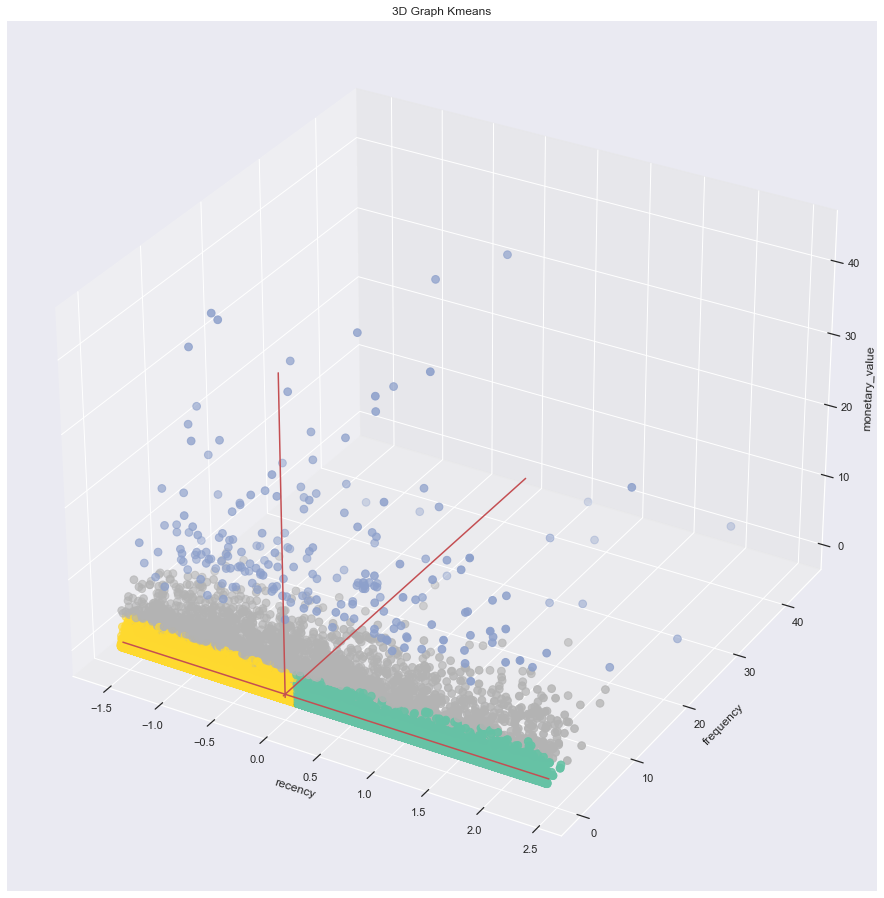

In [26]:
my_color = df_kmeans['Kmeans_cluster']


# Plot initialisation
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_kmeans['recency'], df_kmeans['frequency'],
           df_kmeans['monetary_value'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(df_kmeans['recency']), max(
    df_kmeans['recency'])), (0, 0), (0, 0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(df_kmeans['frequency']), max(
    df_kmeans['frequency'])), (0, 0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0, 0),
             (min(df_kmeans['monetary_value']), max(df_kmeans['monetary_value'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')


# label the axes
ax.set_xlabel("recency")
ax.set_ylabel("frequency")
ax.set_zlabel("monetary_value")
ax.set_title("3D Graph Kmeans")
plt.show()

## Kmeans Recense / Frequence

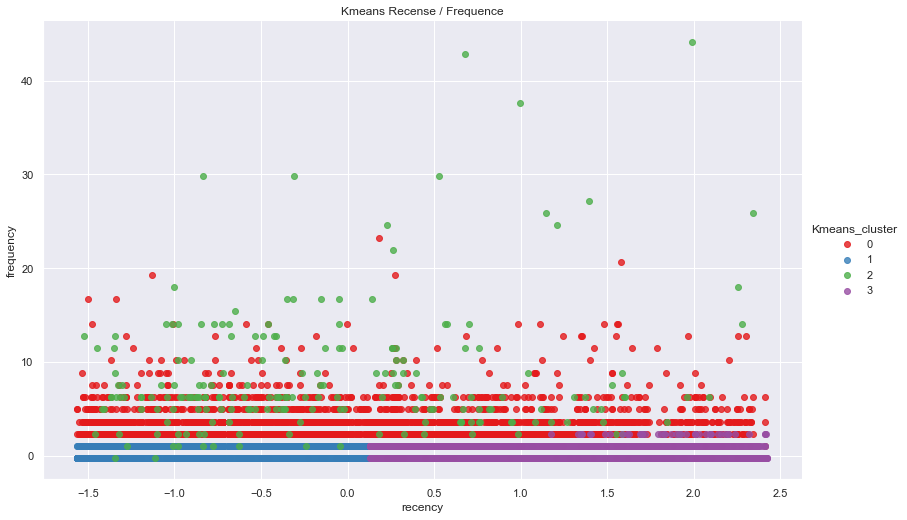

In [27]:
sns.set()
sns.lmplot(
    x='recency',
    y='frequency',
    data=df_kmeans,
    hue='Kmeans_cluster',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('Kmeans Recense / Frequence')
plt.show()

## Kmeans Recense / Montant

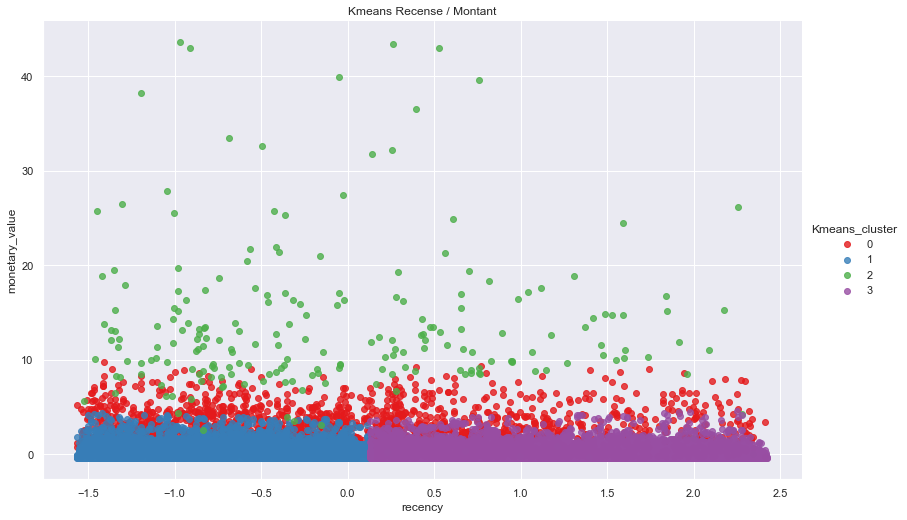

In [28]:
sns.set()
sns.lmplot(
    x='recency',
    y='monetary_value',
    data=df_kmeans,
    hue='Kmeans_cluster',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('Kmeans Recense / Montant')
plt.show()

La meilleure réprésentation des Clusters se fait en fonction de la recense et du montant

## Kmeans Frequence / Montant

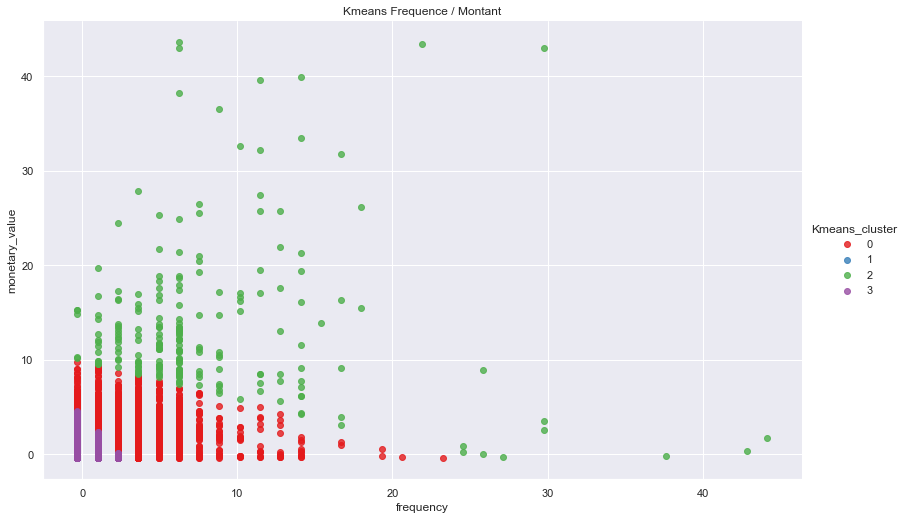

In [29]:
sns.set()
sns.lmplot(
    x='frequency',
    y='monetary_value',
    data=df_kmeans,
    hue='Kmeans_cluster',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('Kmeans Frequence / Montant')
plt.show()

# Analyse en Composante Principale (ACP)

In [30]:
df_acp = df_scaled.copy()

In [31]:
df_acp.columns

Index(['customer_unique_id', 'temps_session', 'experience_client',
       'temps_livraison_estime', 'review_classification', 'temps_de_reponse',
       'longueur_comment_message', 'bed_bath_table', 'health_beauty',
       'sports_leisure', 'furniture_decor', 'computers_accessories',
       'housewares', 'watches_gifts', 'telephony', 'garden_tools', 'auto',
       'toys', 'cool_stuff', 'perfumery', 'baby', 'electronics', 'stationery',
       'fashion_bags_accessories', 'pet_shop', 'office_furniture',
       'luggage_accessories', 'consoles_games',
       'construction_tools_construction', 'home_appliances',
       'small_appliances', 'musical_instruments', 'home_construction',
       'books_general_interest', 'furniture_living_room', 'food',
       'home_confort', 'audio', 'drinks', 'market_place',
       'construction_tools_lights', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'food_drink', 'fashion_shoes',
       'industry_commerce_and_business', 'books_techni

In [32]:
df_acp

,customer_unique_id,temps_session,experience_client,temps_livraison_estime,review_classification,temps_de_reponse,longueur_comment_message,bed_bath_table,health_beauty,sports_leisure,...,kitchen_dining_laundry_garden_furniture,air_conditioning,food_drink,fashion_shoes,industry_commerce_and_business,books_technical,recency,frequency,monetary_value,rfm_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,-0.497017,-0.644179,-1.486913,3.0,0.149248,1.788470,0.959182,-0.163731,-0.157067,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,-0.824816,-0.301230,-0.151566,Meileurs clients
1,0000b849f77a49e4a4ce2b2a4ca5be3f,-0.146233,-0.976614,-1.873083,2.0,-0.224944,-0.571546,-0.145526,0.088595,-0.157067,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,-0.804923,-0.301230,-0.411915,Clients occasionnels à petit budget
2,0000f46a3911fa3c0805444483337064,-0.509437,1.410707,0.453205,2.0,-0.212771,-0.571546,-0.145526,-0.163731,-0.157067,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,1.999912,-0.301230,-0.277939,Clients anciens petit budget
3,0000f6ccb0745a6a4b88665a16c9f078,-0.493045,0.805034,0.922331,2.0,-0.217194,-0.335544,-0.145526,-0.163731,-0.157067,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,0.567656,-0.301230,-0.374625,Clients occasionnels à petit budget
4,0004aac84e0df4da2b147fca70cf8255,-0.491734,0.071598,-0.360799,3.0,0.186756,-0.571546,-0.145526,-0.163731,-0.157067,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,0.348839,-0.301230,-0.026759,Clients occasionnels à gros budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91069,fffcf5a5ff07b0908bd4e2dbc735a684,-0.497170,1.600353,3.610332,3.0,0.138905,-0.571546,-0.145526,38.208128,-0.157067,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,1.403139,1.006343,8.910946,Clients occasionnels à gros budget
91070,fffea47cd6d3cc0a88bd621562a9d061,-0.502411,1.875036,1.041968,2.0,0.244107,-0.571546,-0.145526,-0.163731,-0.157067,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,0.176438,-0.301230,-0.281661,Clients occasionnels à petit budget
91071,ffff371b4d645b6ecea244b27531430a,-0.498174,0.255697,2.466103,3.0,-0.050982,-0.571546,-0.145526,-0.163731,-0.157067,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,2.205467,-0.301230,-0.218384,Clients anciens petit budget
91072,ffff5962728ec6157033ef9805bacc48,-0.475063,-0.064783,0.244158,3.0,-0.050054,2.260473,-0.145526,-0.163731,-0.157067,...,-0.027015,-0.019616,-0.029574,-0.037891,-0.029566,-0.038945,-0.771769,-0.301230,-0.170199,Clients occasionnels à gros budget


## Diagramme éboulis des valeurs propres

### Features Selection:

In [33]:
features = ['experience_client', 'review_classification',
            'recency',
            'frequency', 'monetary_value']
# Separating out the features
X = df_acp.loc[:, features].values

Text(0.5, 1.0, 'Eboulis des valeurs propres')

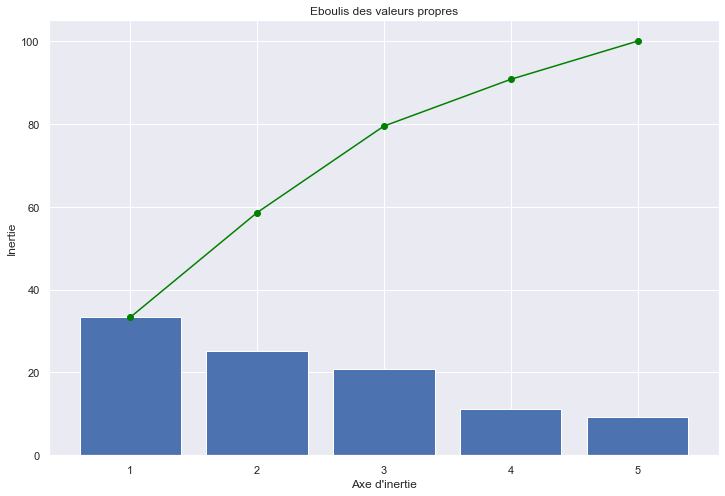

In [34]:
pca = PCA(svd_solver='full').fit(X )
X_projected = pca.transform(X) 

var_expl = pca.explained_variance_ratio_*100

plt.figure(figsize=(12,8))
plt.bar(np.arange(len(var_expl))+1, var_expl)
plt.plot(np.arange(len(var_expl))+1, var_expl.cumsum(),c="green",marker='o')
plt.xlabel("Axe d'inertie")
plt.ylabel("Inertie")
plt.title("Eboulis des valeurs propres")

In [35]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.33316078 0.25279006 0.20889779 0.11286162 0.09228975]
Cumulative Prop. Variance Explained:  [0.33316078 0.58595084 0.79484864 0.90771025 1.        ]


Les 4 premières composantes expliquent 68% de la variance totale des données. Nous transformons donc le dataframe en un dataframe de 4 Composantes principales

In [36]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'])

In [37]:
for_visual = pd.concat([principalDf, df_scaled[['rfm_segment']]], axis=1)

In [38]:
for_visual 

,PCA 1,PCA 2,PCA 3,PCA 4,rfm_segment
0,-0.422756,-1.072835,0.265330,-0.185838,Meileurs clients
1,-0.540213,-1.046095,0.303001,0.218785,Clients occasionnels à petit budget
2,-0.239659,2.367024,-0.840217,0.022378,Clients anciens petit budget
3,-0.369037,1.107399,0.050425,0.128700,Clients occasionnels à petit budget
4,-0.268928,0.130074,-0.354423,-0.309866,Clients occasionnels à gros budget
...,...,...,...,...,...
91069,7.059596,1.449869,-0.513926,-5.743079,Clients occasionnels à gros budget
91070,-0.231779,1.729738,0.912682,0.046224,Clients occasionnels à petit budget
91071,-0.367344,1.302926,-1.811408,-0.211871,Clients anciens petit budget
91072,-0.393651,-0.587524,0.511005,-0.186726,Clients occasionnels à gros budget


## Analyse RFM

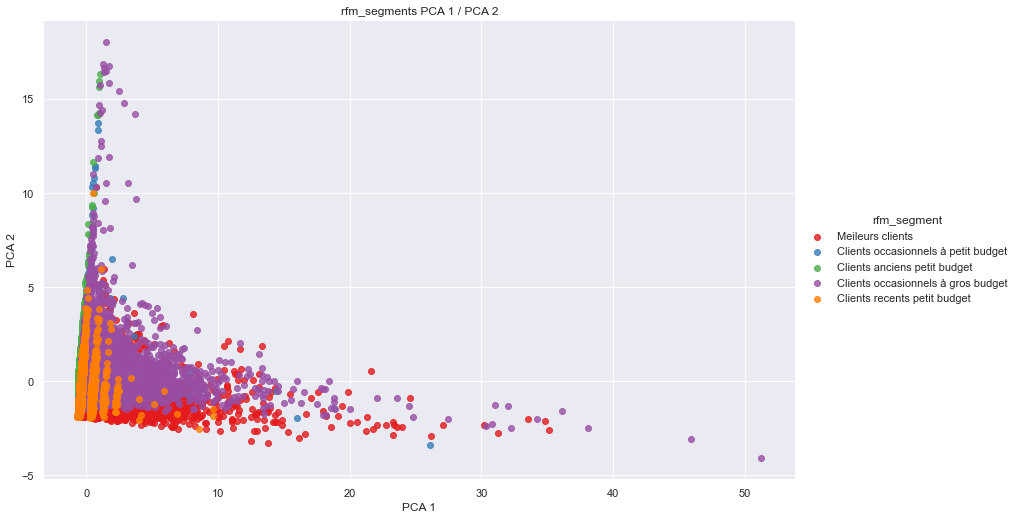

In [39]:
sns.set()
sns.lmplot(
    x='PCA 1',
    y='PCA 2',
    data=for_visual,
    hue='rfm_segment',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('rfm_segments PCA 1 / PCA 2')
plt.show()

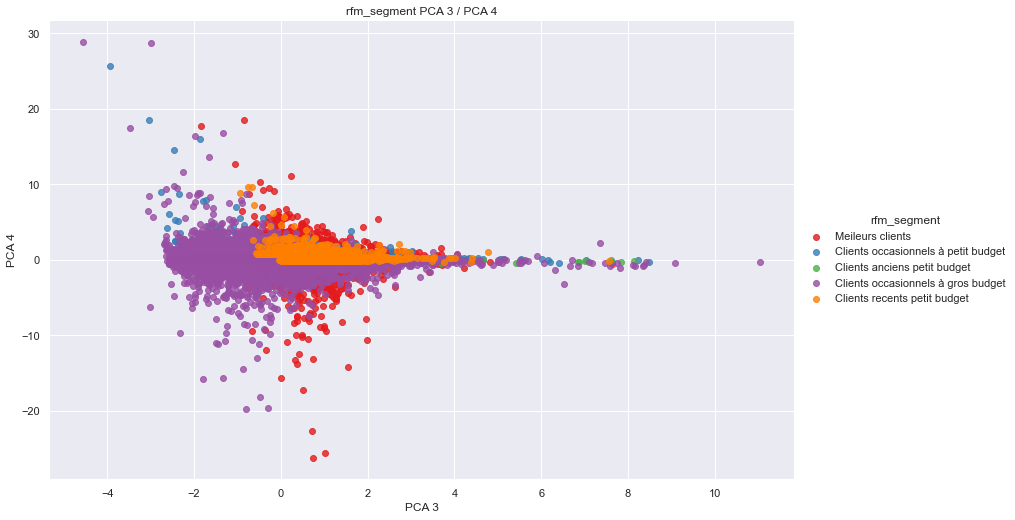

In [40]:
sns.set()
sns.lmplot(
    x='PCA 3',
    y='PCA 4',
    data=for_visual,
    hue='rfm_segment',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('rfm_segment PCA 3 / PCA 4')
plt.show()

In [41]:
for_visual['rfm_segment'].unique()

array(['Meileurs clients', 'Clients occasionnels à petit budget',
       'Clients anciens petit budget',
       'Clients occasionnels à gros budget',
       'Clients recents petit budget'], dtype=object)

In [42]:
couleurs = {'Meileurs clients': 'darkgreen',
            'Clients recents petit budget': 'gold',
            'Clients occasionnels à gros budget': 'darkorange',
            'Clients occasionnels à petit budget': 'blue',
            'Clients anciens petit budget': 'black'}

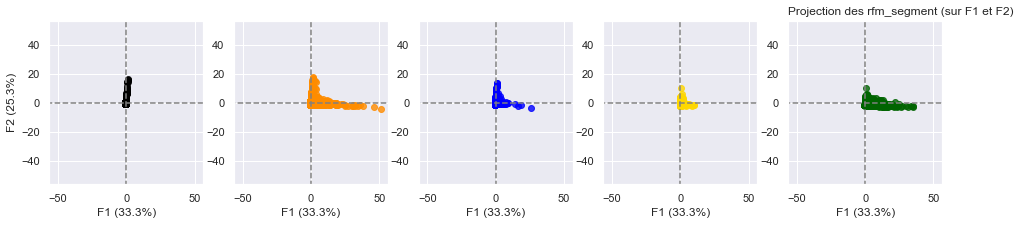

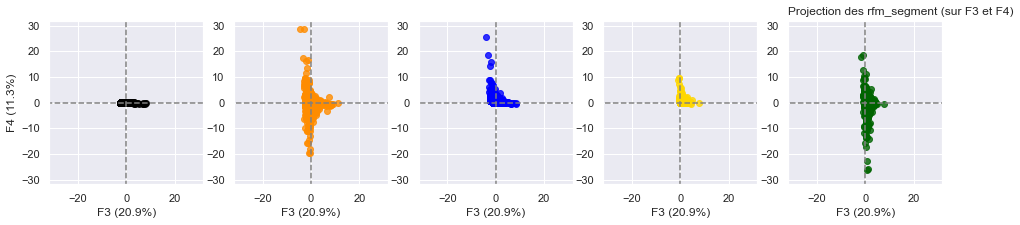

In [43]:
# Projection des individus
X_projected = pca.transform(X)
rfm_segment = for_visual[for_visual['rfm_segment'].notna(
)]['rfm_segment']
for d1, d2 in [(0, 1), (2, 3)]:
    if d2 < 7:

        # initialisation de la figure
        fig = plt.figure(figsize=(16, 3))

        # affichage des points
        pos = 1
        for value in np.unique(rfm_segment):
            selected = np.where(rfm_segment == value)
            plt.subplot(1, 5, pos)
            plt.scatter(X_projected[selected, d1], X_projected[selected,
                        d2], alpha=0.8, label=value, c=couleurs[value])

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            if pos == 1:
                plt.ylabel('F{} ({}%)'.format(
                    d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))
            pos += 1

        plt.title("Projection des rfm_segment (sur F{} et F{})".format(
            d1+1, d2+1), loc='left')
        plt.show()

## Cercle de corrélation

In [44]:
 def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig=plt.figure(figsize=(10,16))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box') 

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='#17aafa', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (PC{} et PC{})".format(d1+1, d2+1))
            plt.show(block=False)

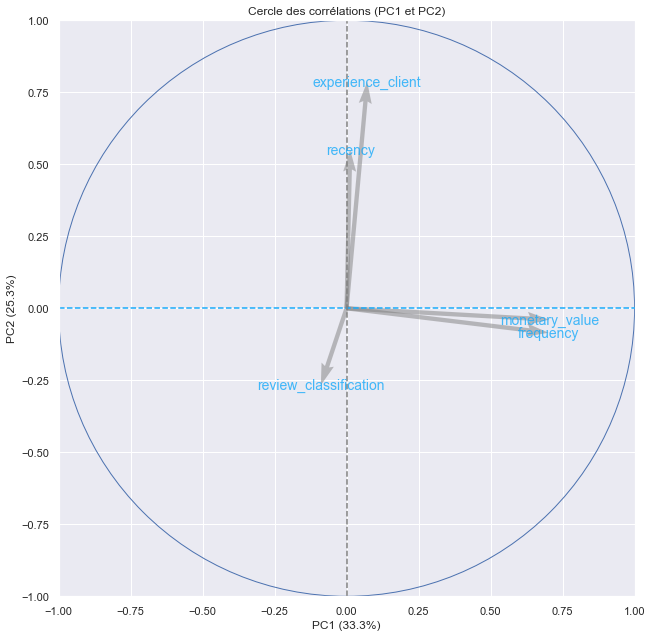

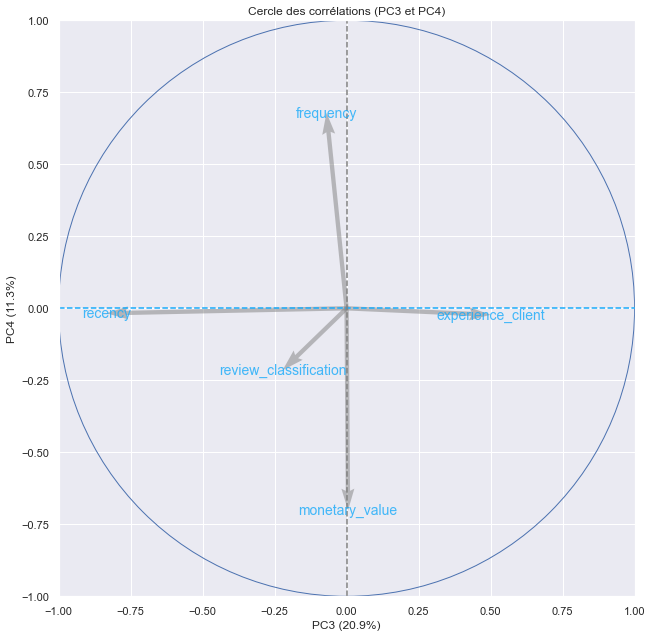

In [45]:
n_comp = 4
pcs = pca.components_
display_circles(pcs, n_comp, pca, [
                (0, 1), (2, 3), (4, 5)], labels=np.array(features))

##  Kmeans Clustering with PCA values

In [46]:
df_Kmeans = principalDf.copy()

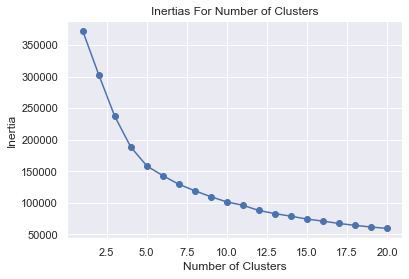

In [47]:
inertias = []

for i in range(1,21):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_Kmeans)
    inertias.append(kmeans.inertia_)
    
# Plot inertia for different values of K
plt.plot(range(1,21), inertias, marker = 'o')
plt.title('Inertias For Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [48]:
k = 5

In [49]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_Kmeans)
labels = kmeans.labels_

In [50]:
score_kmeans = silhouette_score(df_Kmeans, labels)
score_kmeans 

0.3656155659449878

In [51]:
df_Kmeans['Kmeans_cluster'] = kmeans.labels_

In [52]:
df_Kmeans 

,PCA 1,PCA 2,PCA 3,PCA 4,Kmeans_cluster
0,-0.422756,-1.072835,0.265330,-0.185838,1
1,-0.540213,-1.046095,0.303001,0.218785,1
2,-0.239659,2.367024,-0.840217,0.022378,0
3,-0.369037,1.107399,0.050425,0.128700,0
4,-0.268928,0.130074,-0.354423,-0.309866,0
...,...,...,...,...,...
91069,7.059596,1.449869,-0.513926,-5.743079,4
91070,-0.231779,1.729738,0.912682,0.046224,2
91071,-0.367344,1.302926,-1.811408,-0.211871,0
91072,-0.393651,-0.587524,0.511005,-0.186726,1


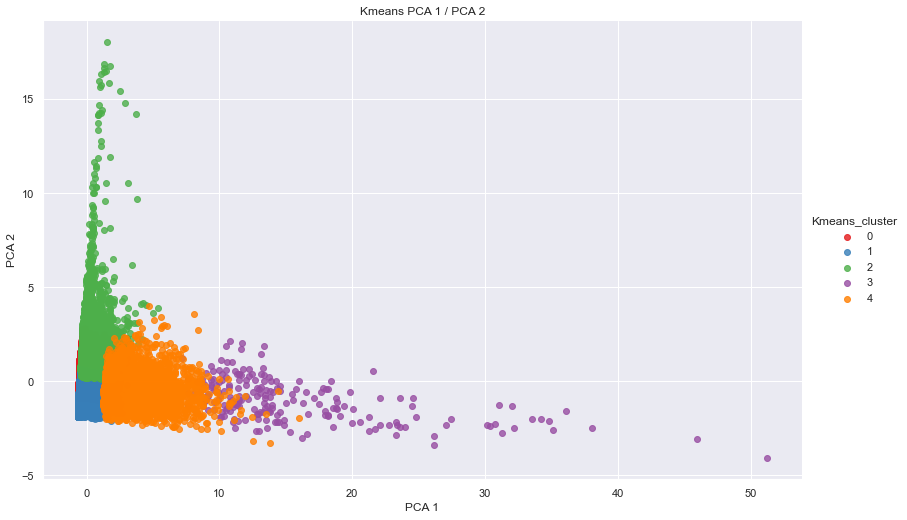

In [53]:
sns.set()
sns.lmplot(
    x='PCA 1',
    y='PCA 2',
    data=df_Kmeans,
    hue='Kmeans_cluster',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('Kmeans PCA 1 / PCA 2')
plt.show()

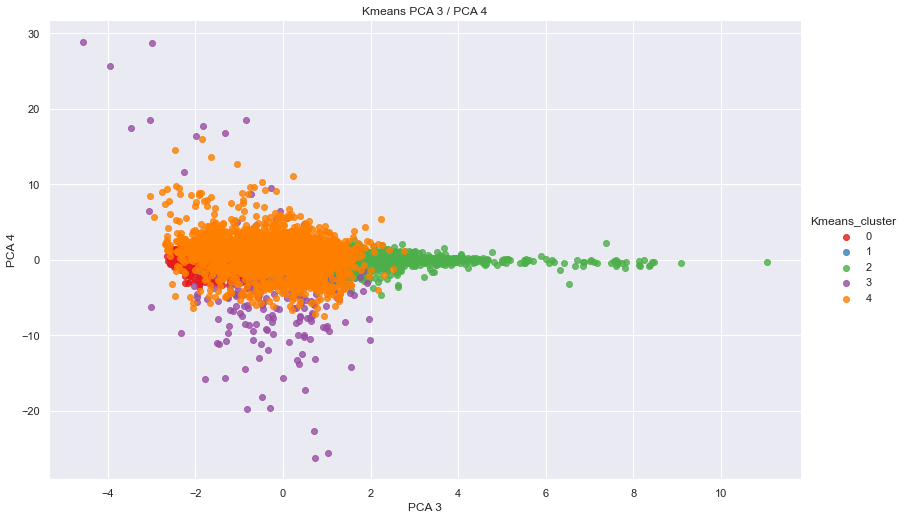

In [54]:
sns.set()
sns.lmplot(
    x='PCA 3',
    y='PCA 4',
    data=df_Kmeans,
    hue='Kmeans_cluster',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('Kmeans PCA 3 / PCA 4')
plt.show()

In [55]:
couleurs = {0: 'darkgreen',
            1: 'gold',
            2: 'darkorange',
            3: 'blue',
            4: 'black'}

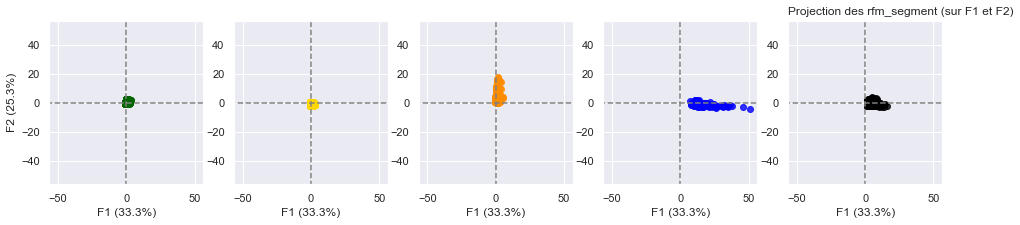

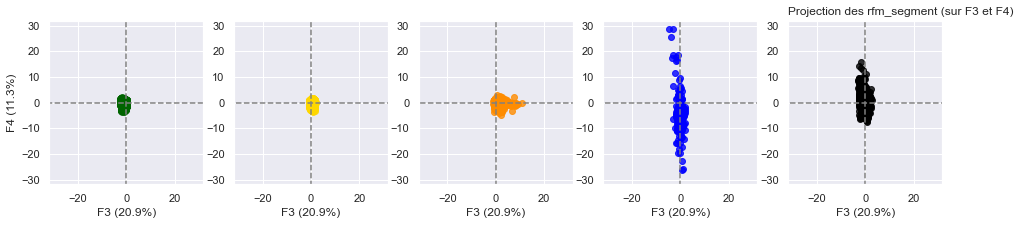

In [56]:
# Projection des individus
cluster_segment = df_Kmeans[df_Kmeans['Kmeans_cluster'].notna(
)]['Kmeans_cluster']
for d1, d2 in [(0, 1), (2, 3)]:
    if d2 < 4:

        # initialisation de la figure
        fig = plt.figure(figsize=(16, 3))

        # affichage des points
        pos = 1
        for value in np.unique(cluster_segment):
            selected = np.where(cluster_segment == value)
            plt.subplot(1, 5, pos)
            plt.scatter(X_projected[selected, d1], X_projected[selected,
                        d2], alpha=0.8, label=value, c=couleurs[value])

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            if pos == 1:
                plt.ylabel('F{} ({}%)'.format(
                    d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))
            pos += 1

        plt.title("Projection des rfm_segment (sur F{} et F{})".format(
            d1+1, d2+1), loc='left')
        plt.show()

### Kmean results

In [57]:
df['Kmeans_cluster'] = kmeans.labels_

In [58]:
resultat_kmeans = df.groupby('Kmeans_cluster').agg({"temps_session": 'mean',
                                                    "experience_client": 'mean',
                                                   "review_classification": 'mean',
                                                    "recency": 'mean',
                                                    "frequency": 'mean',
                                                    "monetary_value": 'mean'})
resultat_kmeans

,temps_session,experience_client,review_classification,recency,frequency,monetary_value
Kmeans_cluster,,,,,,
0,34215.948813,9.414963e+05,2.561893,512.392901,1.116805,159.498976
1,36054.959830,7.990211e+05,2.586881,241.358144,1.110927,157.798093
2,44035.514040,2.628625e+06,1.717116,350.481803,1.121282,194.714384
3,73840.642403,1.244266e+06,2.049204,351.603865,7.483092,6232.894976
4,39229.971248,9.817723e+05,2.229139,352.954425,3.562268,931.543328


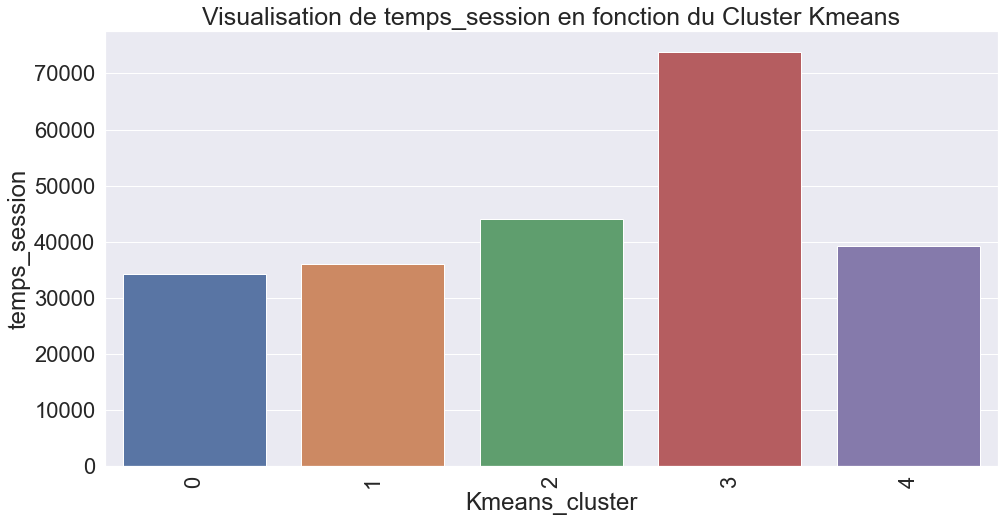

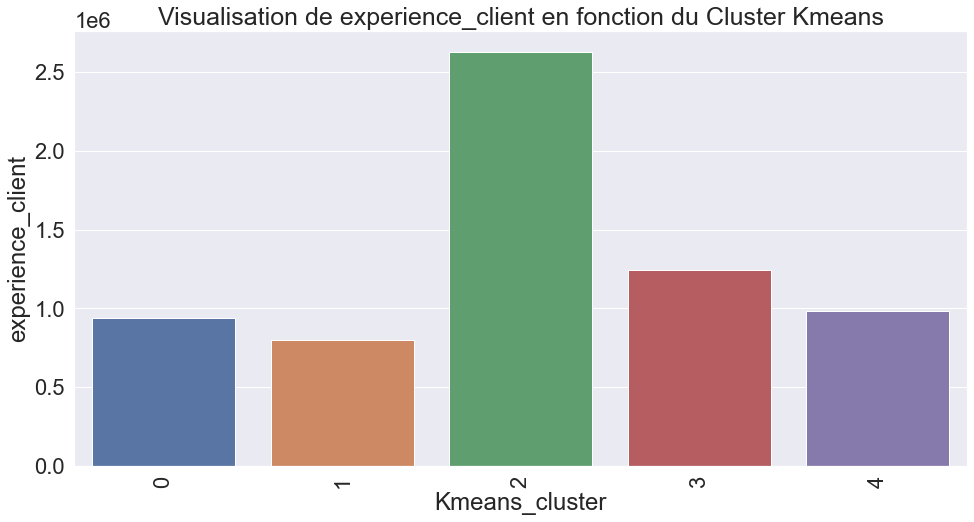

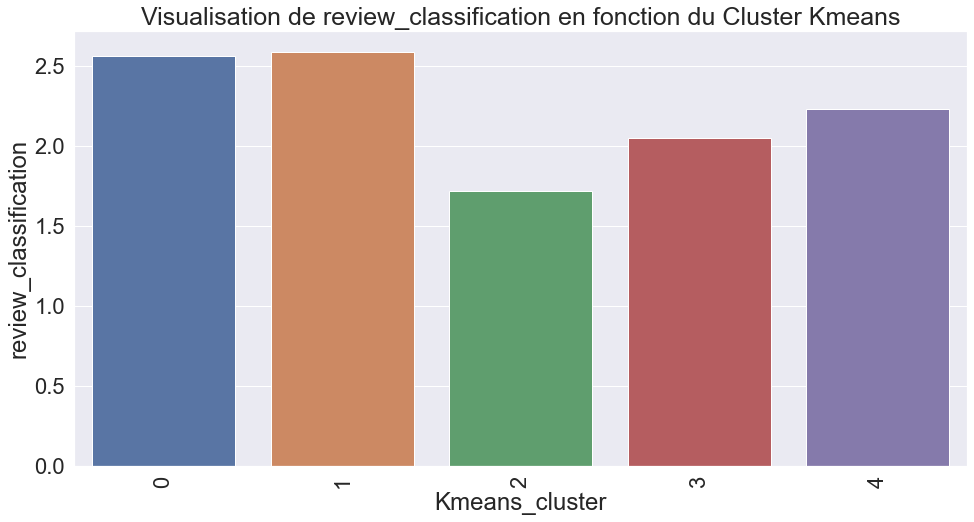

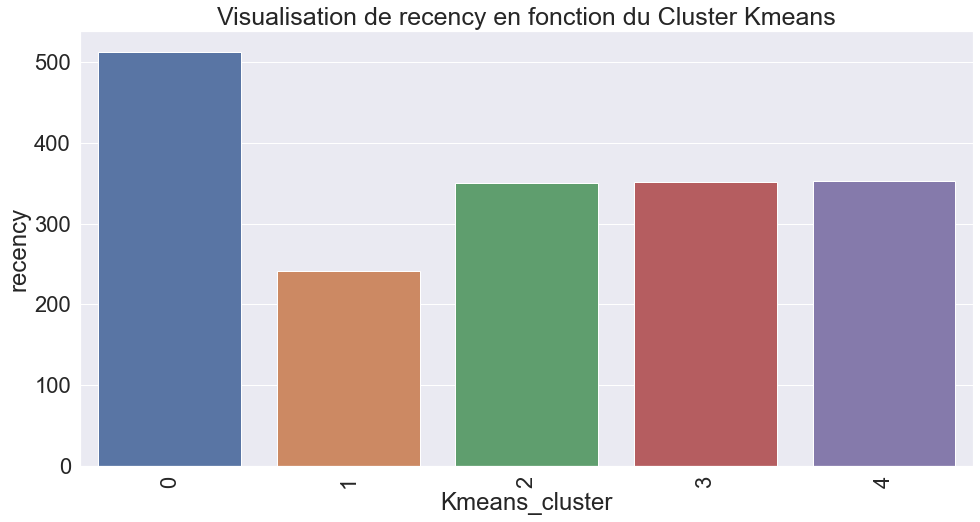

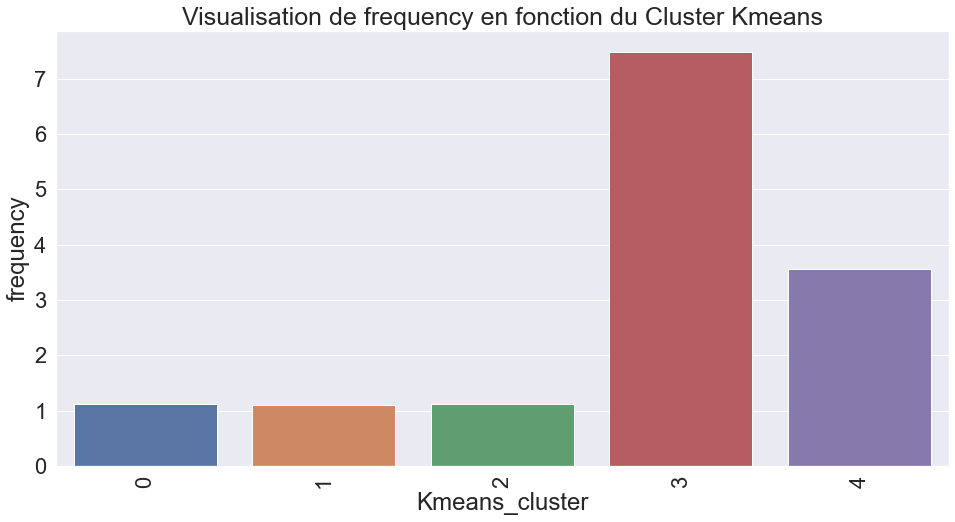

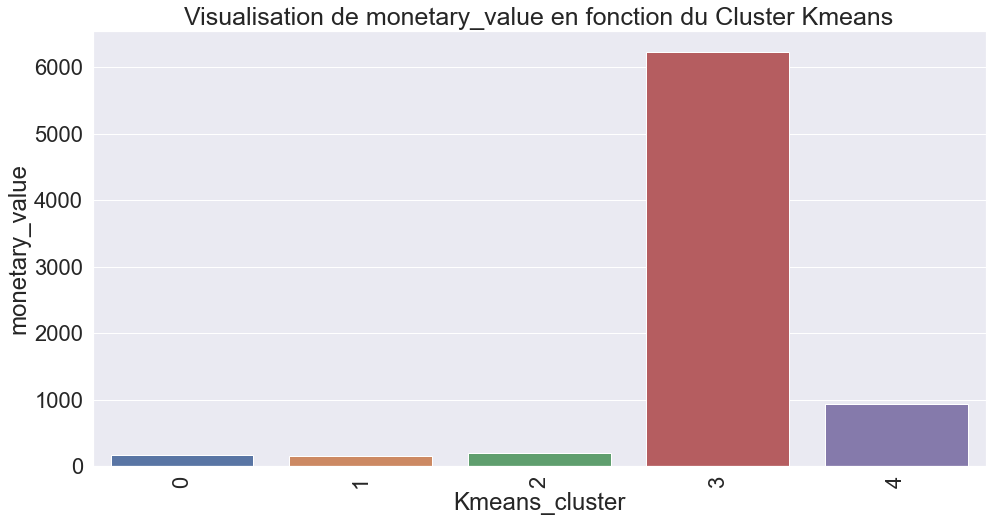

In [59]:
for col in resultat_kmeans:
    plt.figure(figsize=[16, 8])
    sns.set(font_scale=2)
    sns.barplot(x=resultat_kmeans.index, y=col, data=resultat_kmeans)
    plt.title("Visualisation de "+ col + " en fonction du Cluster Kmeans", fontsize=25)
    plt.xticks(rotation='90')
    plt.show()

## Classification ascendante hiérarchique (CAH) with PCA values

In [60]:
df_CAH = principalDf.copy()

In [61]:
# Définition du nombre de lots
batch_size = 1000

# Définition du nombre de clusters
n_clusters = 5

# Initialisation de l'agglomérative clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Boucle pour traiter les données par lots
for i in range(0, df_CAH.shape[0], batch_size):
    batch = df_CAH.iloc[i:i + batch_size, :]
    batch_labels = agg_clustering.fit_predict(batch)
    if i == 0:
        labels = batch_labels
    else:
        labels = np.concatenate([labels, batch_labels])
        
score_CAH = silhouette_score(df_CAH, labels)
print(score_CAH)

-0.05029979419754316


In [62]:
# Ajout des étiquettes au jeu de données
df_CAH["CAH_cluster"] = labels

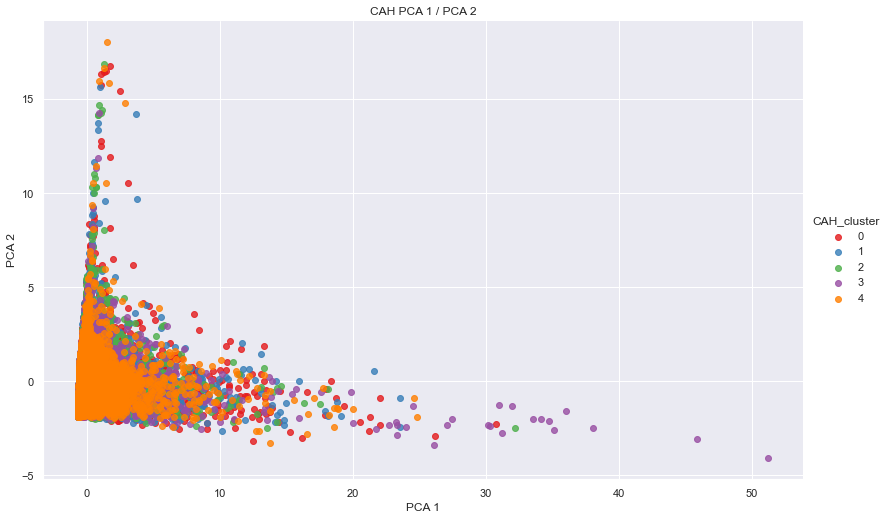

In [63]:
sns.set()
sns.lmplot(
    x='PCA 1',
    y='PCA 2',
    data=df_CAH,
    hue='CAH_cluster',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('CAH PCA 1 / PCA 2')
plt.show()

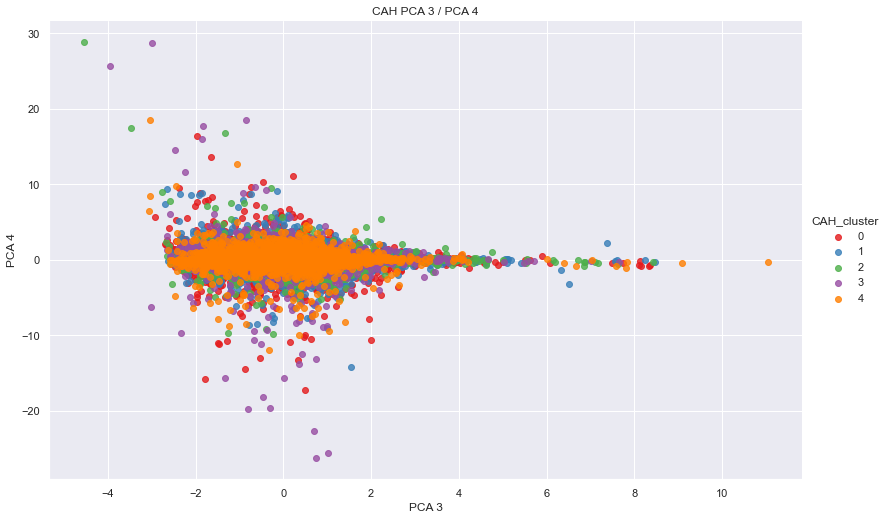

In [64]:
sns.set()
sns.lmplot(
    x='PCA 3',
    y='PCA 4',
    data=df_CAH,
    hue='CAH_cluster',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('CAH PCA 3 / PCA 4')
plt.show()

In [65]:
couleurs = {0: 'darkgreen',
            1: 'gold',
            2: 'darkorange',
            3: 'blue',
            4: 'black'}

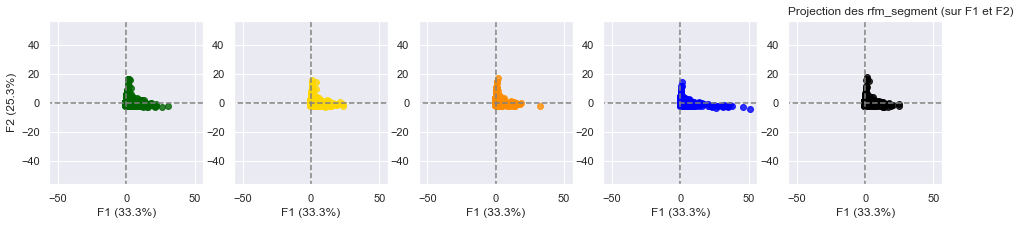

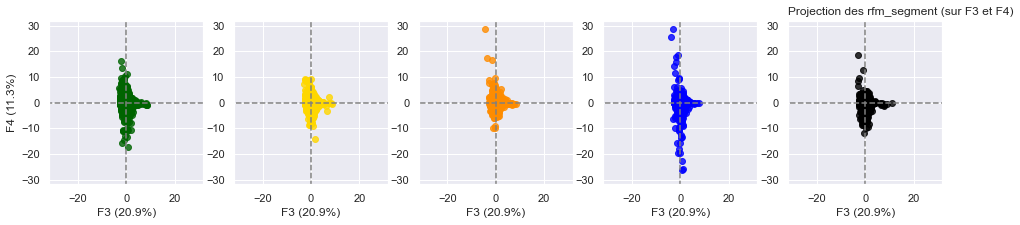

In [66]:
# Projection des individus
cluster_segment = df_CAH[df_CAH["CAH_cluster"].notna(
)]['CAH_cluster']
for d1, d2 in [(0, 1), (2, 3)]:
    if d2 < 5:

        # initialisation de la figure
        fig = plt.figure(figsize=(16, 3))

        # affichage des points
        pos = 1
        for value in np.unique(cluster_segment):
            selected = np.where(cluster_segment == value)
            plt.subplot(1, 5, pos)
            plt.scatter(X_projected[selected, d1], X_projected[selected,
                        d2], alpha=0.8, label=value, c=couleurs[value])

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            if pos == 1:
                plt.ylabel('F{} ({}%)'.format(
                    d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))
            pos += 1

        plt.title("Projection des rfm_segment (sur F{} et F{})".format(
            d1+1, d2+1), loc='left')
        plt.show()

### CAH results

In [67]:
df["CAH_cluster"] = labels

In [68]:
resultat_CAH = df.groupby('CAH_cluster').agg({"temps_session": 'mean',
                                                    "experience_client": 'mean',
                                                   "review_classification": 'mean',
                                                    "recency": 'mean',
                                                    "frequency": 'mean',
                                                    "monetary_value": 'mean'})
resultat_CAH

,temps_session,experience_client,review_classification,recency,frequency,monetary_value
CAH_cluster,,,,,,
0,37538.563627,1.158996e+06,2.415842,344.391726,1.315353,235.513791
1,37104.390480,1.133741e+06,2.433699,367.216296,1.236729,212.395501
2,35843.183207,1.106666e+06,2.451968,377.663748,1.173503,184.935867
3,36602.590100,9.947054e+05,2.493071,375.621735,1.229144,217.313104
4,35162.120127,8.959804e+05,2.539703,324.803203,1.169872,187.692722


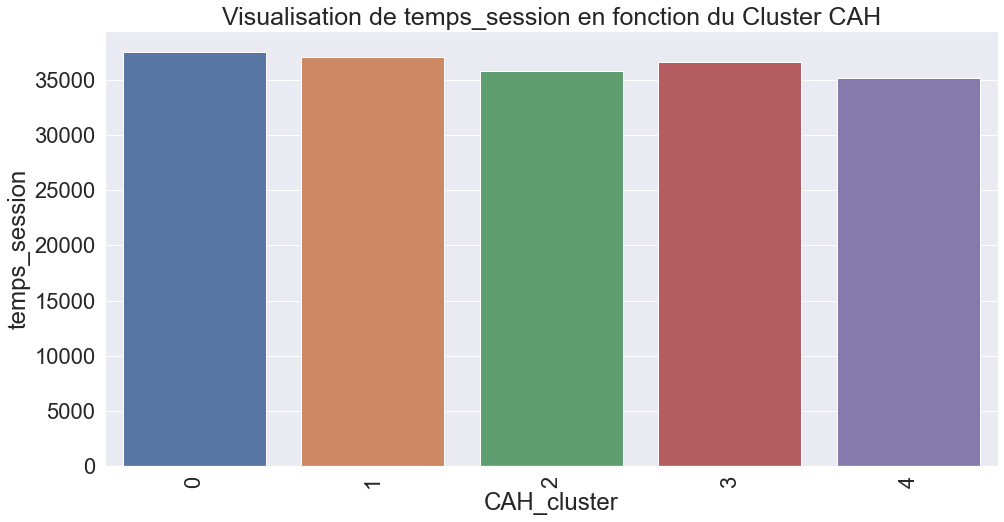

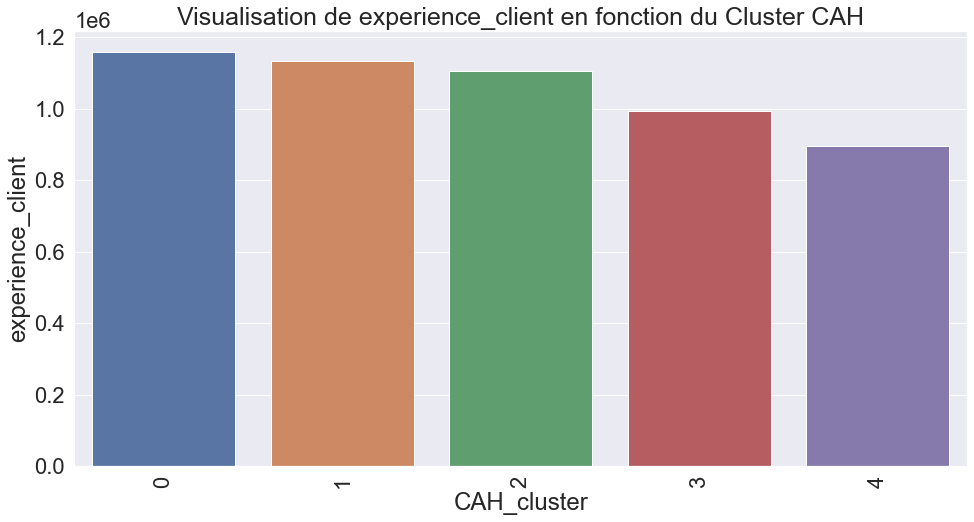

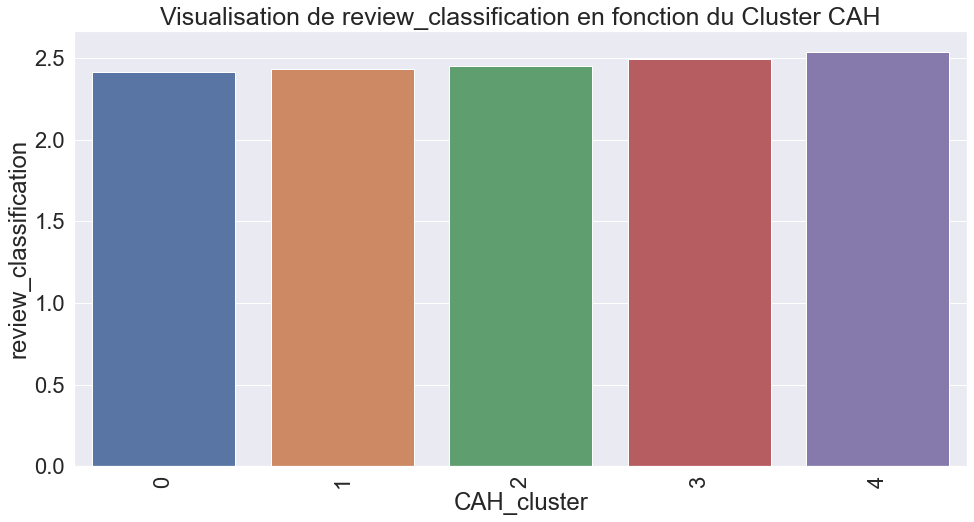

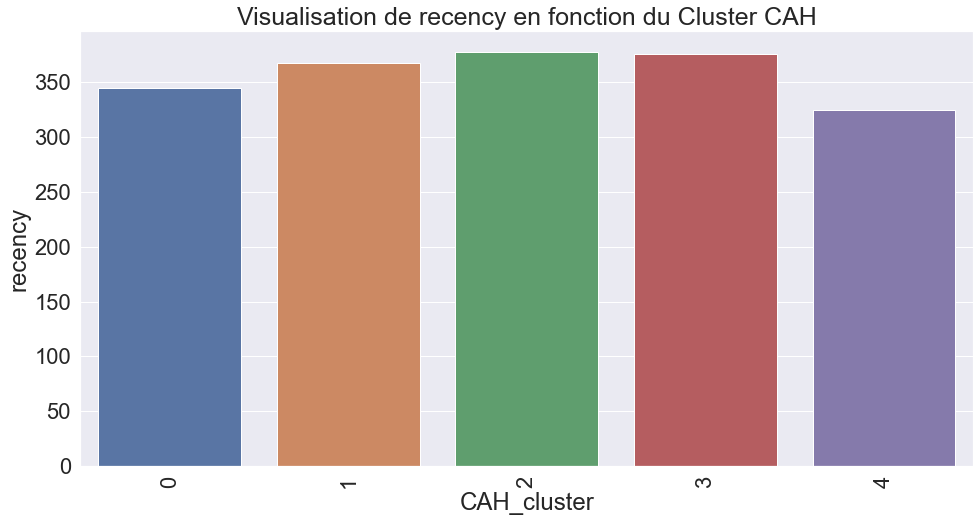

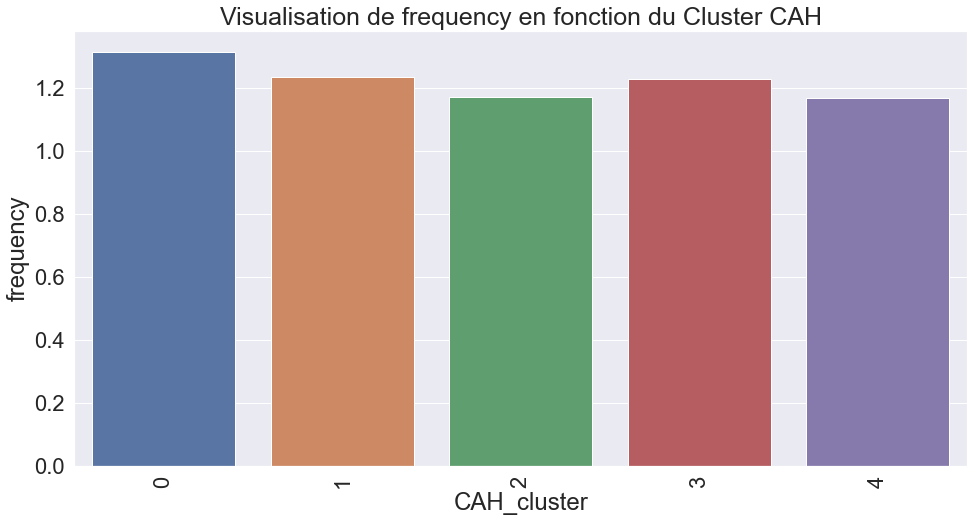

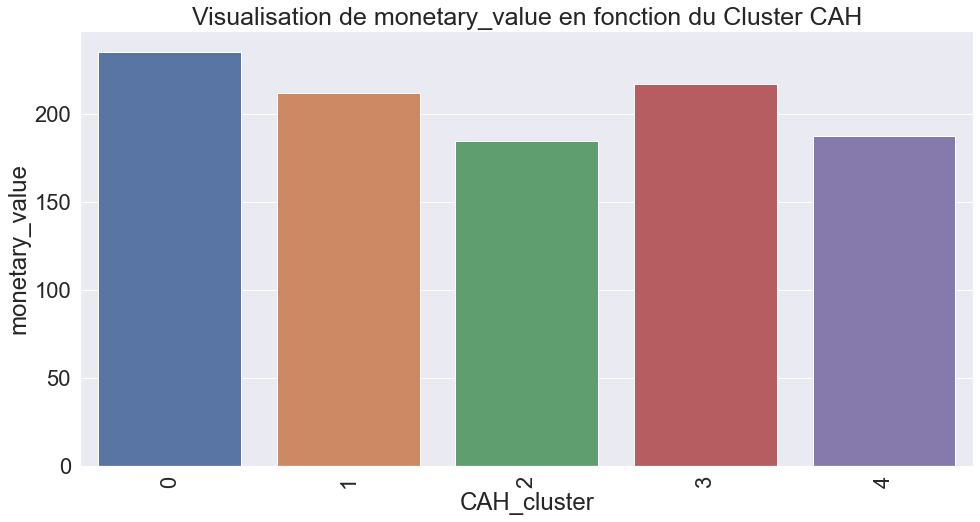

In [69]:
for col in resultat_CAH:
    plt.figure(figsize=[16, 8])
    sns.set(font_scale=2)
    sns.barplot(x=resultat_CAH.index, y=col, data=resultat_CAH)
    plt.title("Visualisation de "+ col + " en fonction du Cluster CAH", fontsize=25)
    plt.xticks(rotation='90')
    plt.show()

## DBScan with PCA values
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering non-paramétrique qui permet de regrouper des points de données en fonction de leur densité dans l'espace. Il utilise deux paramètres clés: 
* Le rayon de voisinage 
* Le nombre minimum de points requis pour former un cluster.

In [70]:
df_DBscan = principalDf.copy()

In [71]:
# Sélectionner un sous-ensemble aléatoire de 50% des lignes
df_sampled = df_DBscan.sample(frac=0.2, random_state=1)

In [72]:
eps = np.arange(0.1,4,0.5)
silhouetteDBSCAN = []
DBSCANs = []
for i in eps:
    model = DBSCAN(eps=i)
    model.fit(df_sampled)
    DBSCANs.append(model)
    score = silhouette_score(df_sampled,
                             model.labels_)
    silhouetteDBSCAN.append(score)

In [73]:
print(score)

0.9157418596572288


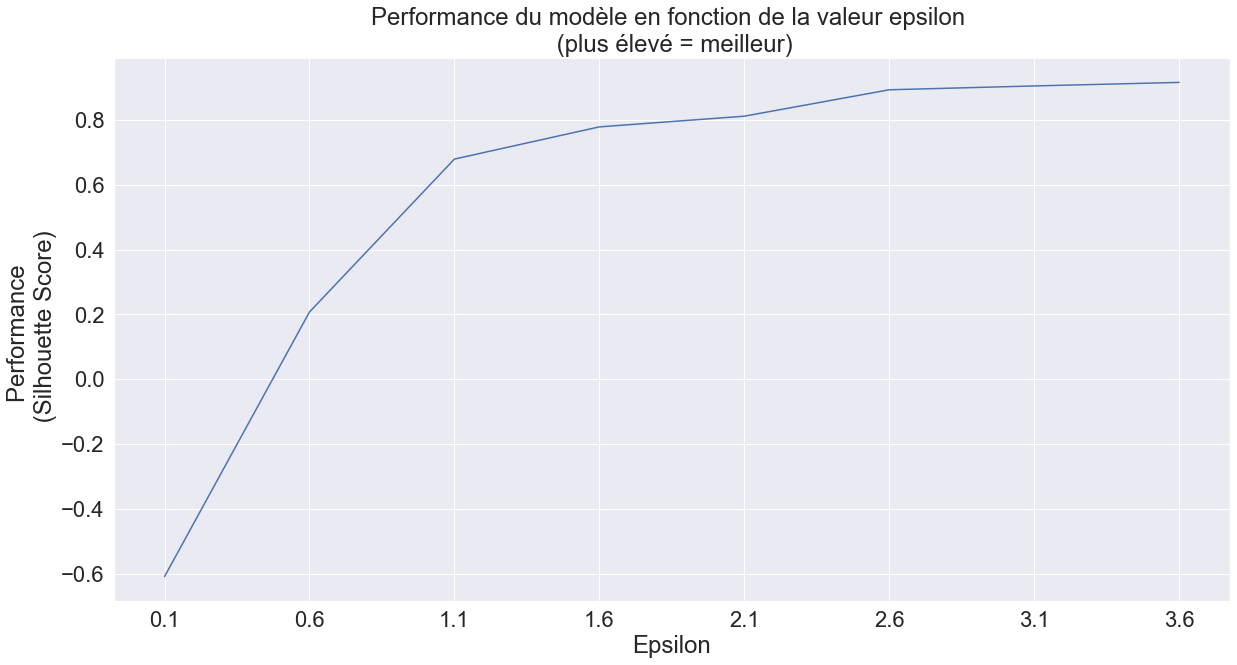

In [74]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Performance du modèle en fonction de la valeur epsilon \n (plus élevé = meilleur)')
ax.set_xticks(eps)
ax.set_xlabel('Epsilon')
ax.set_ylabel('Performance \n (Silhouette Score)')
sns.lineplot(x=eps,
             y=silhouetteDBSCAN);

In [75]:
db = DBSCAN(eps=3, min_samples=100).fit(df_sampled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Even if we don't specify the number of cluster DBSCAN is good at detecting the number of clusters unlike k-means in which the number of clusters need to be specified.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [76]:
score_DBscan = silhouette_score(df_sampled, labels)
print(score_DBscan)

0.8551626879986917


In [78]:
# add pred_cluster to joined_Users
df_sampled['DBScan_cluster'] = labels

In [79]:
df_sampled

,PCA 1,PCA 2,PCA 3,PCA 4,DBScan_cluster
50910,-0.483139,0.987294,-1.647633,-0.104257,0
83922,-0.371166,0.072946,0.937815,-0.167850,0
40689,1.724443,2.155731,1.254804,0.222077,0
2215,0.631254,-1.016486,0.358655,0.864029,0
5251,-0.131974,0.090329,-0.624622,-0.456650,0
...,...,...,...,...,...
79670,-0.169931,0.096245,-1.108551,-0.434630,0
12911,-0.492548,0.378230,-0.536138,-0.083232,0
79902,-0.492206,-0.719553,0.415413,-0.097278,0
71030,-0.365520,0.612663,0.435184,0.117570,0


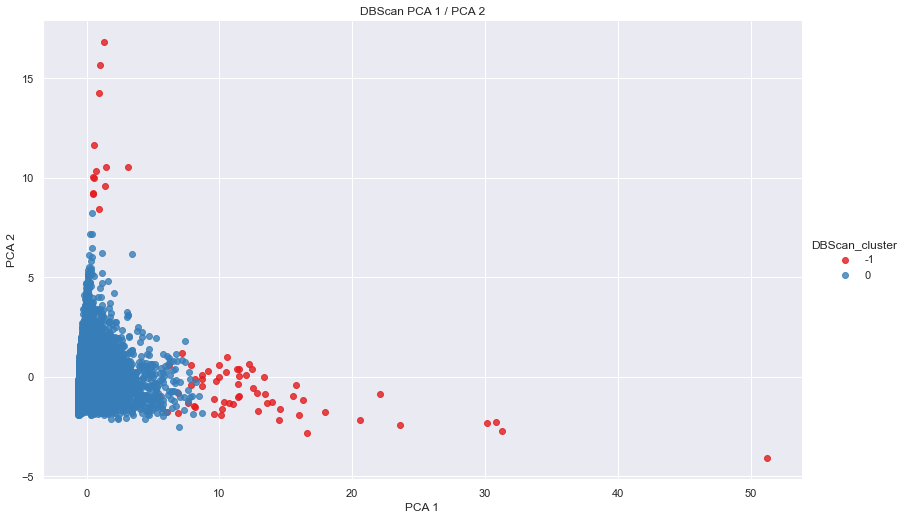

In [80]:
sns.set()
sns.lmplot(
    x='PCA 1',
    y='PCA 2',
    data=df_sampled,
    hue='DBScan_cluster',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('DBScan PCA 1 / PCA 2')
plt.show()

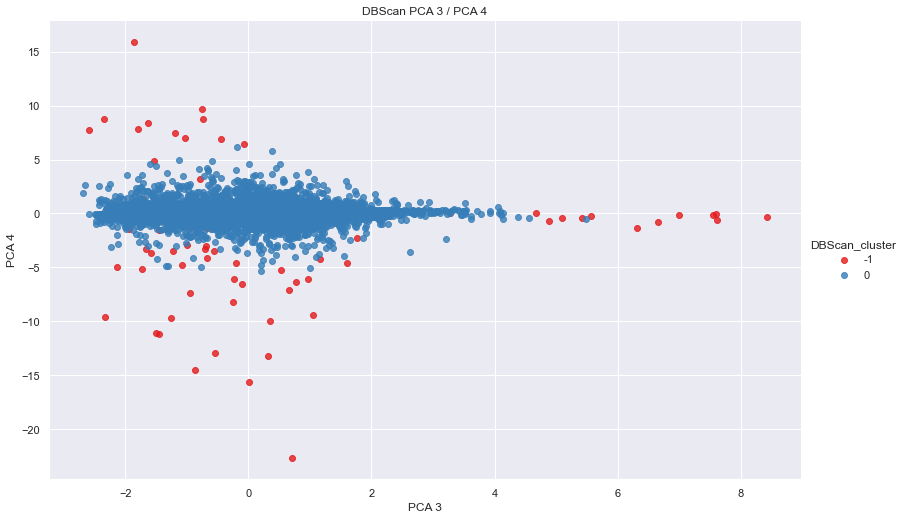

In [81]:
sns.set()
sns.lmplot(
    x='PCA 3',
    y='PCA 4',
    data=df_sampled,
    hue='DBScan_cluster',
    fit_reg=False,
    legend=True,
    palette="Set1",
    height=7, aspect=1.6)

plt.title('DBScan PCA 3 / PCA 4')
plt.show()

# Conclusion

Le silhouette score est une mesure de qualité de clustering qui évalue à quel point chaque point d'un cluster est similaire aux autres points de ce cluster par rapport aux points des autres clusters. Plus le score est proche de 1, plus le clustering est considéré comme approprié

In [82]:
score_kmeans

0.3656155659449878

In [83]:
score_CAH

-0.05029979419754316

In [84]:
score_DBscan

0.8551626879986917

In [85]:
df.to_csv('olist_cluster_analysis.csv', index=False, header=True)